# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/dataset/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')), delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное - в чистом виде нет, но RM стремится к нормальному, MEDV тоже, хотя наблюдаются выбросы.
2.   Равномерное - нет
3.   Биноминальное - нет
4.   Бернулли - да, CHAS
5.   Геометрическое - нет
6.   Логнормальное - да, DIS, CRIM, LSTAT



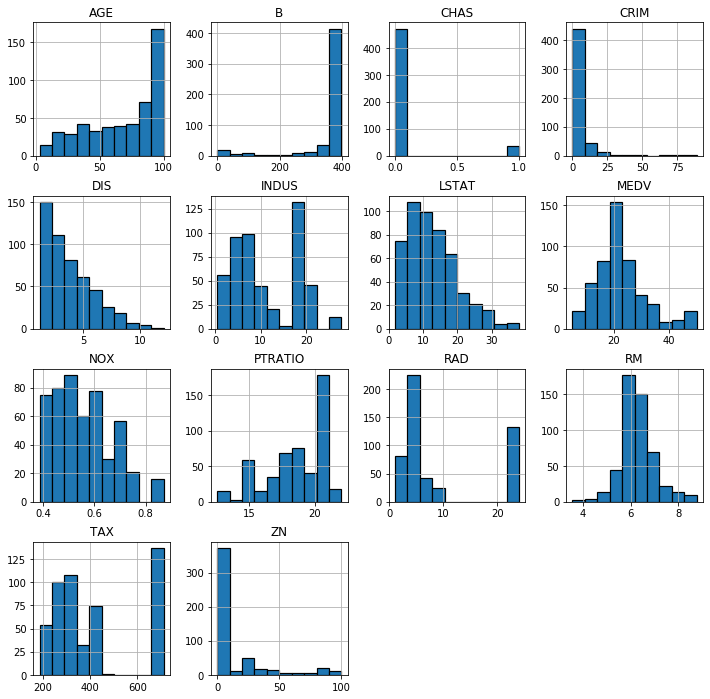

In [3]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# Напишите код, который будет рисовать распределения попарно - точечные распределение

In [4]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

C:\Users\lenta\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenta\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


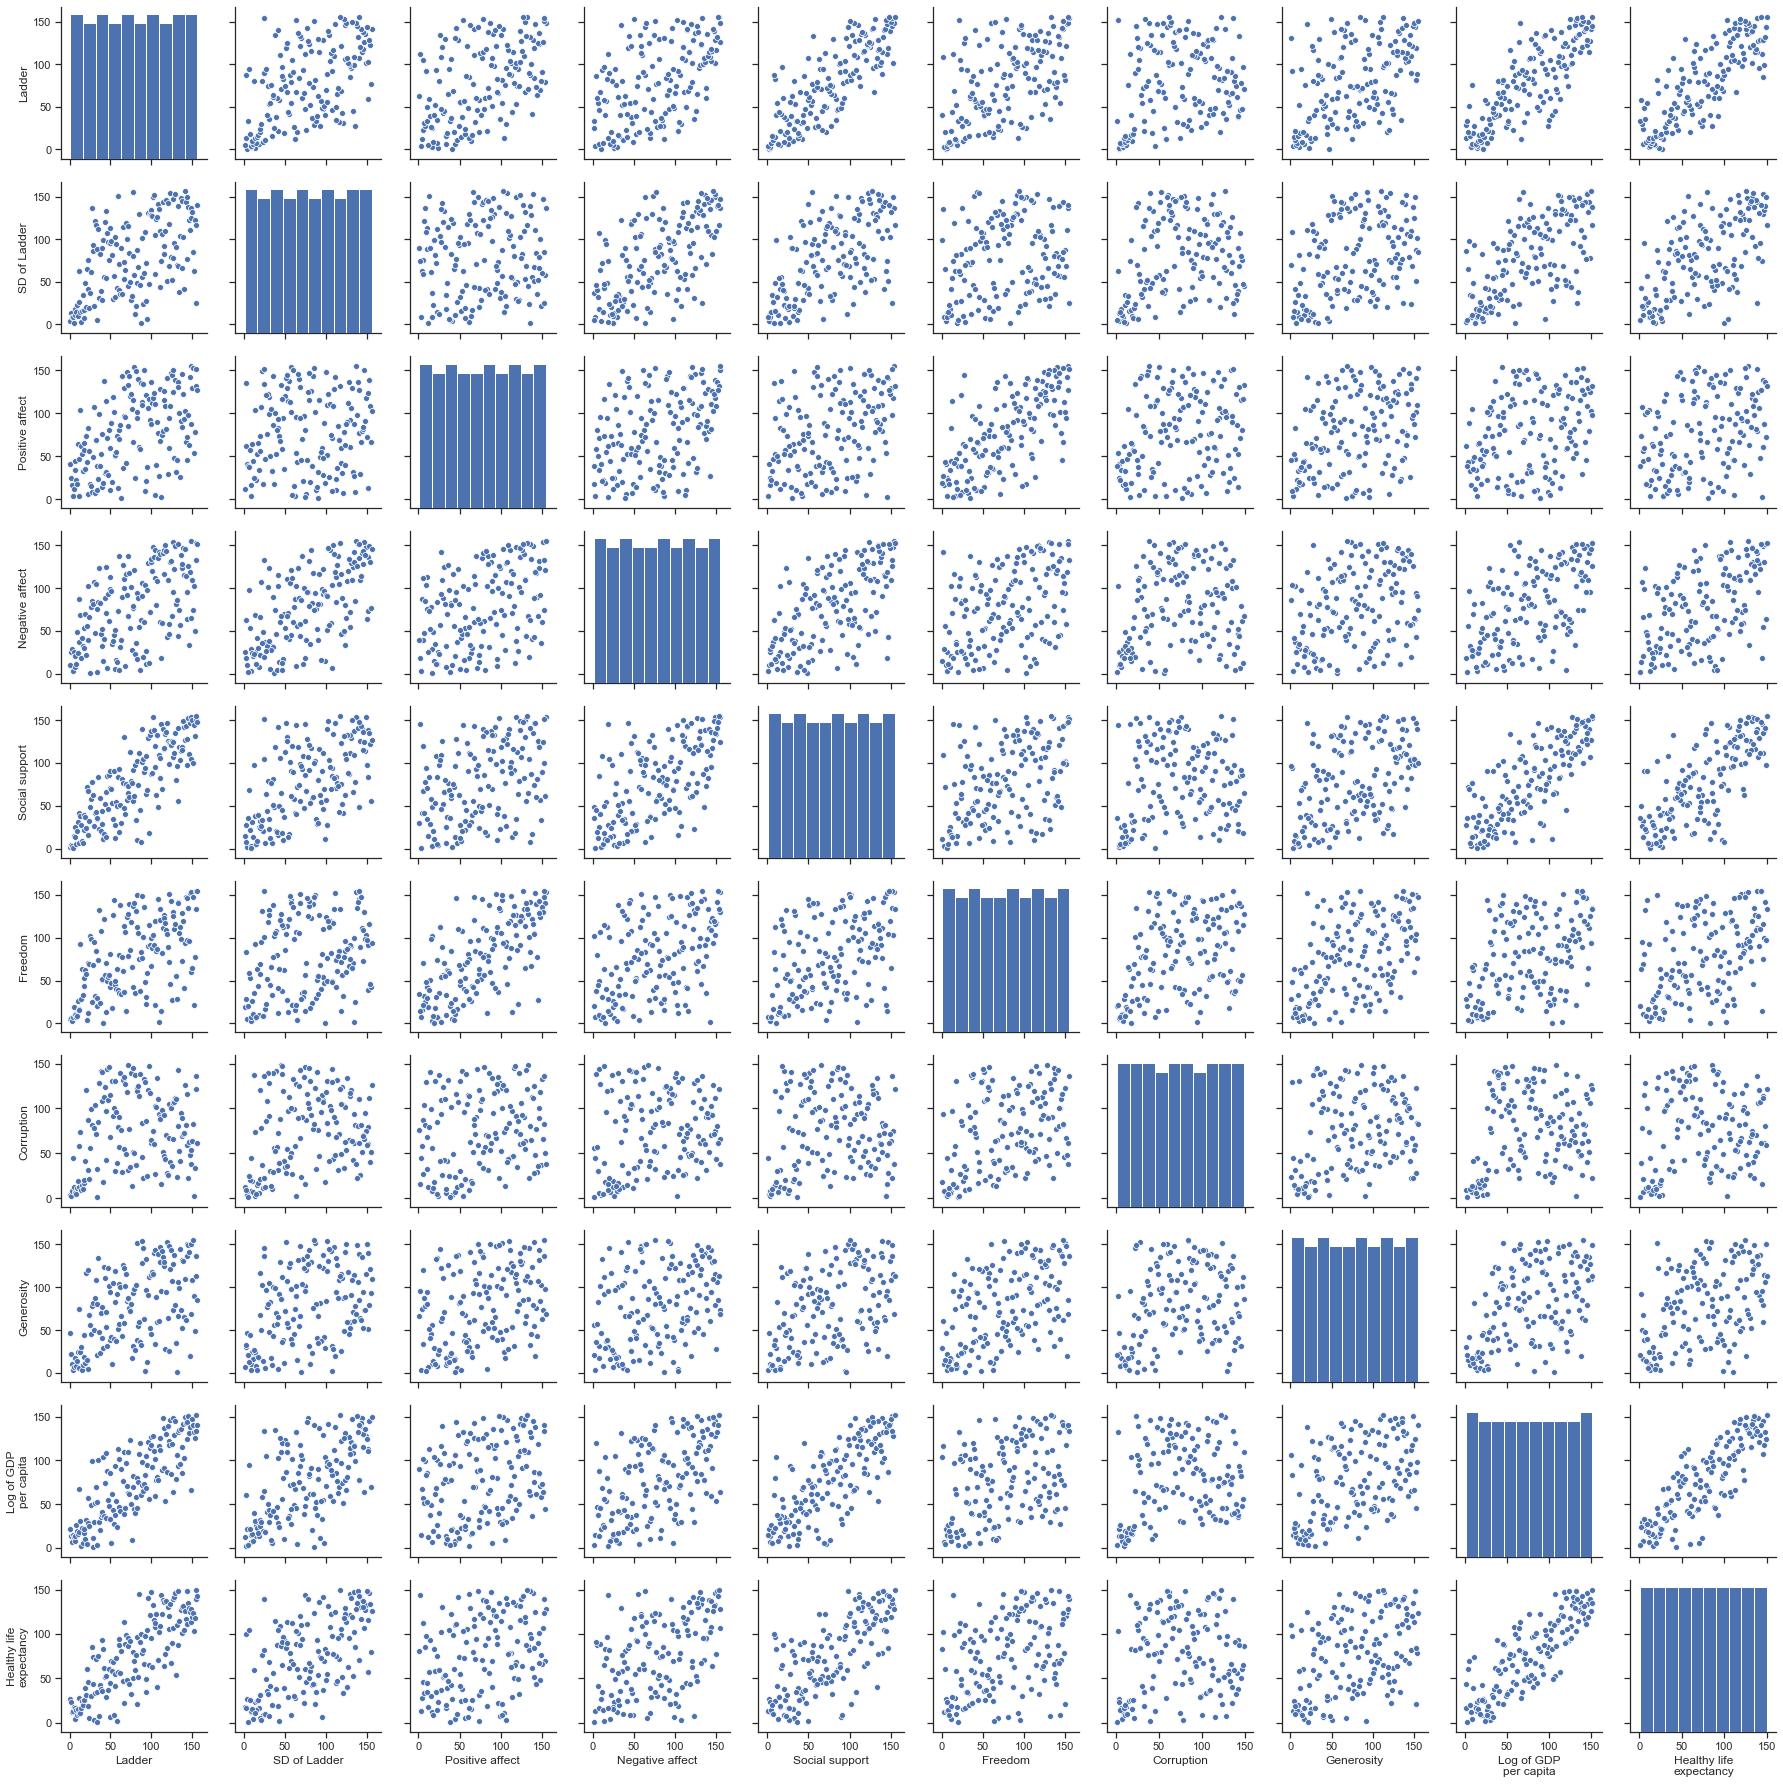

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show(g)

# Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [6]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [7]:
# размер таблицы
print(np.shape(data))

(156, 11)


Сначала найдем пустые значения:

# Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [8]:
# можно так
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [9]:
# а можно так:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

В таблице 23 отсутствующих значения, в выборке Country - 0 осутствующих значений.

In [10]:
# удалим отсутствующие значения в таблице
data2 = data.dropna()

In [11]:
# посмотрим получившийся размер таблицы
print(np.shape(data2))

(140, 11)


In [12]:
#Нарисуем матрицу ковариаций попарно.
#Для этого создадим таблицу X из таблицы data2 - уберем столбец "Country (region)"
X = data2.drop(data2.columns[0], axis='columns')
X.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [13]:
# Посчитаем матрицу ковариаций с помощью numpy.cov()
np.cov(X)

array([[ 2.89788889e+02,  1.19766667e+02,  4.43333333e+01, ...,
         1.25133333e+02, -8.81777778e+01, -1.77644444e+02],
       [ 1.19766667e+02,  9.09000000e+01,  6.08888889e+01, ...,
        -2.90222222e+01, -1.20444444e+01,  6.42222222e+00],
       [ 4.43333333e+01,  6.08888889e+01,  6.28888889e+01, ...,
        -1.00000000e+01,  8.55555556e+00, -7.77777778e-01],
       ...,
       [ 1.25133333e+02, -2.90222222e+01, -1.00000000e+01, ...,
         1.47960000e+03,  2.94200000e+02, -3.28888889e+00],
       [-8.81777778e+01, -1.20444444e+01,  8.55555556e+00, ...,
         2.94200000e+02,  2.80622222e+02,  3.65533333e+02],
       [-1.77644444e+02,  6.42222222e+00, -7.77777778e-01, ...,
        -3.28888889e+00,  3.65533333e+02,  1.02448889e+03]])

In [14]:
# посмотрим размерность матрицы
print(np.shape(np.cov(X)))

(140, 140)


In [15]:
# Можно заметить, что данная команда считает матрицу корреляций для всех рядов в таблице (их 140). 
# Нам же нужно посмотреть ковариацию между колонками таблицы. Для этого мы транспонируем матрицу.
np.cov(X.T)

array([[2088.55066804, 1171.89280576, 1037.04069887, 1097.68016444,
        1745.00719424, 1126.43720452,  437.43597122,  992.82230216,
        1625.96176773, 1661.55015416],
       [1171.89280576, 2127.17014388,  184.69568345, 1298.79928058,
        1268.0323741 ,  520.63165468,  498.41654676,  796.97446043,
        1327.72014388, 1293.22194245],
       [1037.04069887,  184.69568345, 1965.29311408,  694.32127441,
         880.13669065, 1392.96279548,  427.18848921,  826.97194245,
         597.45693731,  661.01243577],
       [1097.68016444, 1298.79928058,  694.32127441, 1980.79527235,
        1369.01438849,  835.04152107,  316.04028777,  697.80791367,
        1091.69558068,  992.67965057],
       [1745.00719424, 1268.0323741 ,  880.13669065, 1369.01438849,
        2099.08633094,  989.15107914,  290.97841727,  918.33453237,
        1592.89208633, 1521.89568345],
       [1126.43720452,  520.63165468, 1392.96279548,  835.04152107,
         989.15107914, 2034.81932169,  784.23597122, 1005

In [16]:
# из-за того, что данные ненормированные, матричные значения отличаются.
# Приведем к нормальному виду и посчитаем матрицу ковариаций.
standardized = (X - X.mean()) / X.std()

In [17]:
np.cov(standardized.T)

array([[1.        , 0.55598652, 0.51186994, 0.53967651, 0.83341164,
        0.54641367, 0.22439426, 0.48570397, 0.82060756, 0.82667749],
       [0.55598652, 1.        , 0.09033207, 0.63273394, 0.6000868 ,
        0.25024565, 0.25334428, 0.38633667, 0.66397713, 0.6375542 ],
       [0.51186994, 0.09033207, 1.        , 0.35190627, 0.43333255,
        0.69656705, 0.22590489, 0.41706116, 0.31084267, 0.33903234],
       [0.53967651, 0.63273394, 0.35190627, 1.        , 0.67138722,
        0.41593489, 0.16647247, 0.35054093, 0.56575636, 0.50714773],
       [0.83341164, 0.6000868 , 0.43333255, 0.67138722, 1.        ,
        0.47861307, 0.14888995, 0.44813453, 0.80189757, 0.75529202],
       [0.54641367, 0.25024565, 0.69656705, 0.41593489, 0.47861307,
        1.        , 0.4075713 , 0.49822612, 0.38591935, 0.42394886],
       [0.22439426, 0.25334428, 0.22590489, 0.16647247, 0.14888995,
        0.4075713 , 1.        , 0.2811459 , 0.18614014, 0.1489734 ],
       [0.48570397, 0.38633667, 0.4170611

# Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [18]:
# В исходной выборке 156 стран, в обработанной - 140 стран.
# Но проверим
count=data2['Country (region)'].unique().tolist()
print (count)

['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Costa Rica', 'Israel', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States', 'Czech Republic', 'Malta', 'Mexico', 'France', 'Chile', 'Guatemala', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador', 'Italy', 'Slovakia', 'Trinidad and Tobago', 'Poland', 'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica', 'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary', 'Paraguay', 'Peru', 'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya', 'Montenegro', 'Tajikistan', 'Croatia', 'Dominican Republic', 'Bosnia and Herzegovina ', 'Turkey', 'Malaysia', 'Belarus', 'Greece', 'Mongolia', 'Macedonia', 'Nigeria', 'Kyrgyzstan', 'Algeria', 'Morocco', 'Azerbaijan', 'Lebanon', 'Indo

In [19]:
len(count)

140

# Можно ли сказать, что данные значения - это проблема классификации?
- Нет.
Думаю, нужна градация, например, на "Страны с высоким уровнем счастья", "Страны со средним уровнем счастья", "Страны с низким уровнем счастья". И по какому-то алгоритму относить страну к тому или иному классу.

# Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [20]:
# Матрица ковариаций равна матрице корреляций, если данные нормированы.
# Для подсчета матрицы корреляций можно использовать метод corr, который нормализует значения.
X.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


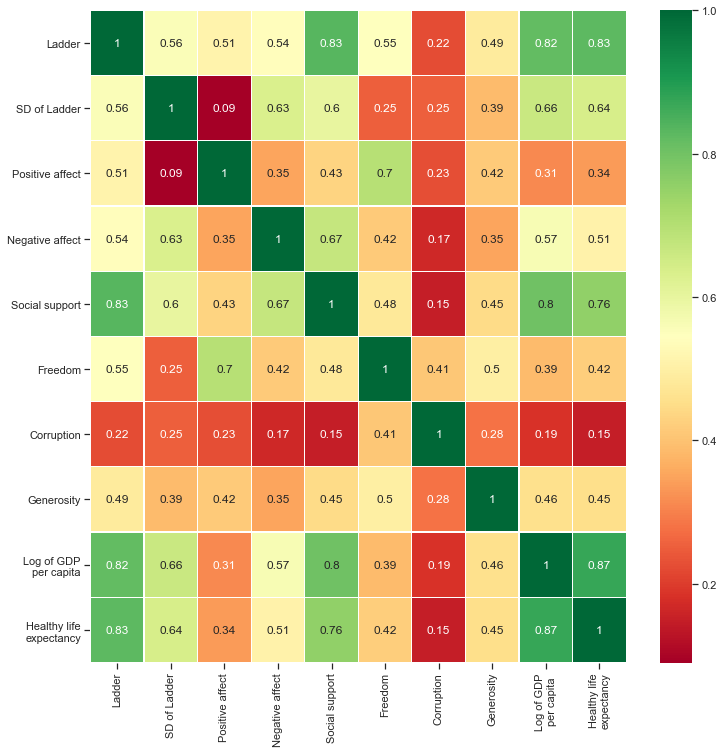

In [21]:
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Чем выше социальная поддержка, ВВП на душу наседенияи и Healthy life expectancy, тем выше удовлетворенность жизнью (Ladder) и т.д. 

# Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

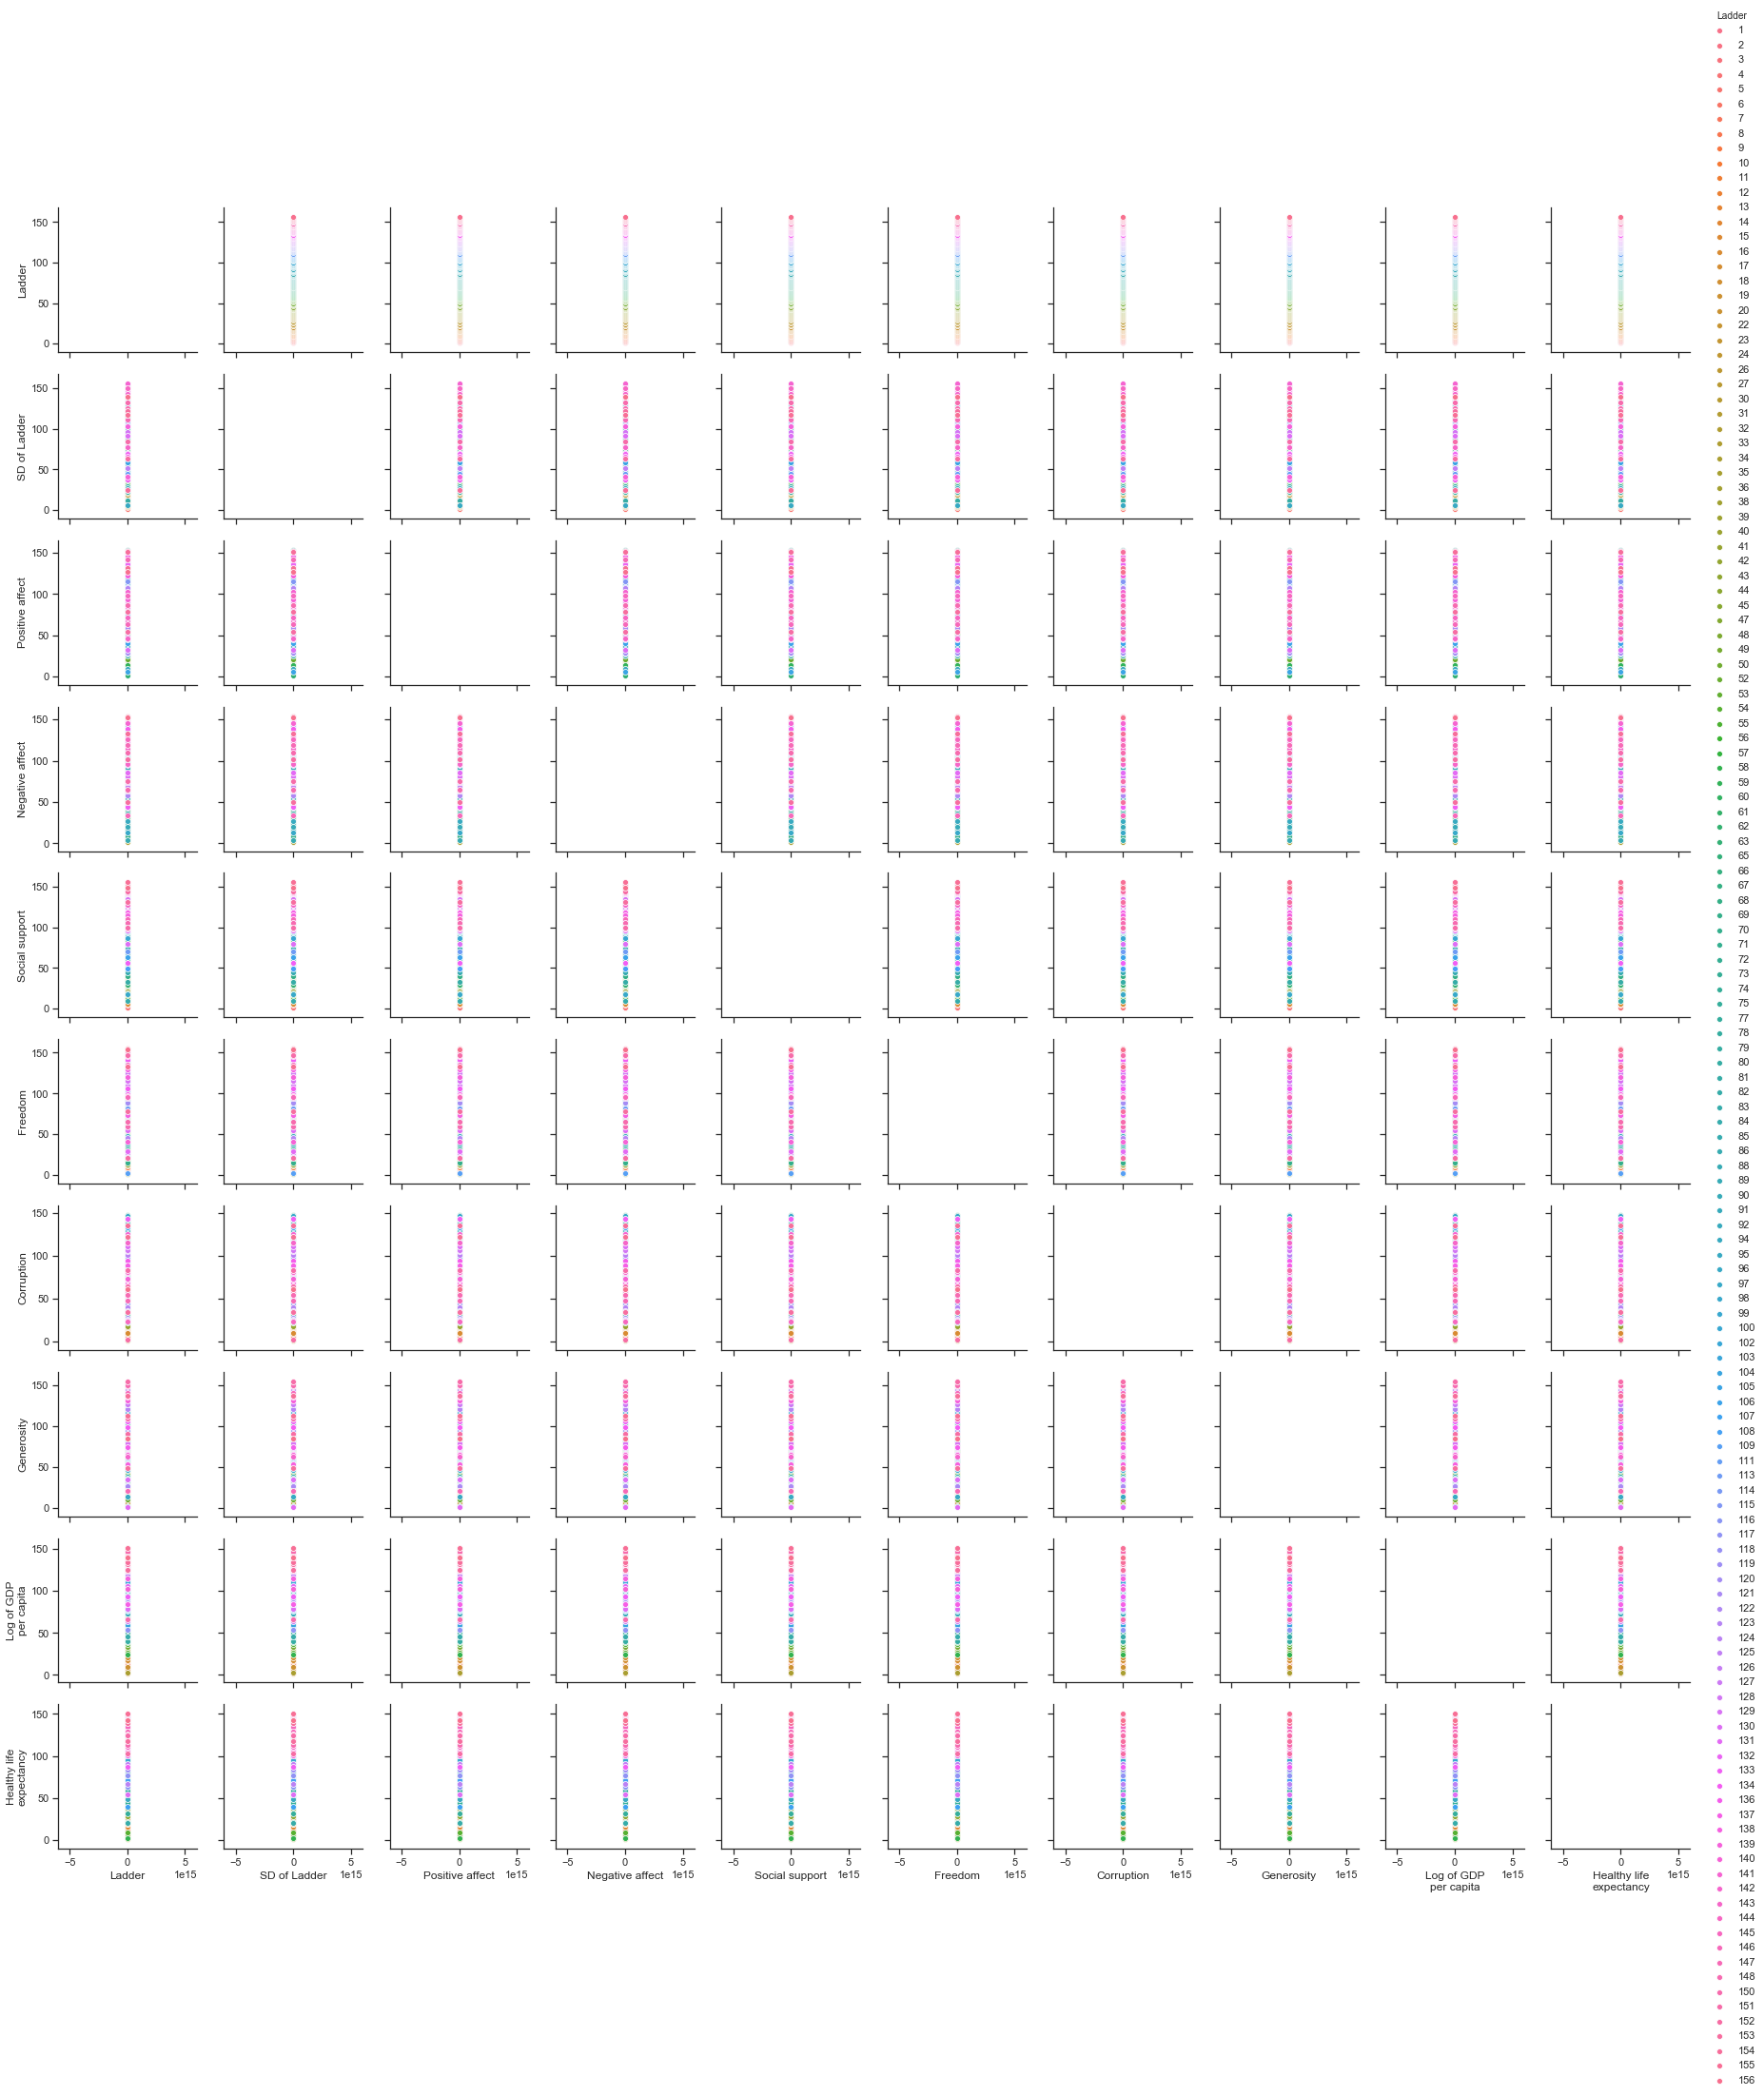

In [123]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data2, hue='Ladder')
plt.show()

По графику нельзя сделать вывод, какие страны похожи.

# **Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. 
Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

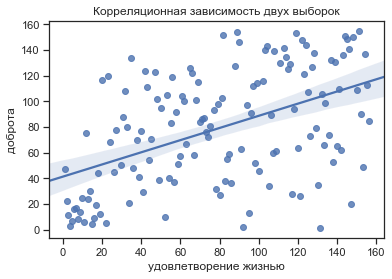

In [22]:
ladder = X['Ladder']
generosity = X['Generosity']
sns.regplot(x= ladder, y=generosity,data=X, fit_reg=True)
plt.xlabel('удовлетворение жизнью')
plt.ylabel('доброта')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Линейная регрессия - нахождение прямой, которая описывает корреляцию между двумя переменными наилучшим образом (сумма расстояний от каждого элемента до прямой **минимальна**).
Собственный вектор показывает направление наибольшего разброса выборки.
При проецировании всех точек на собственный вектор разброс данных получается **максимальным**.
Линия регрессии не является собственным вектором.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

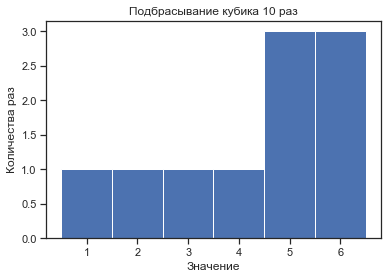

In [23]:
import pylab
import numpy

# Количество испытаний
trials = 10

# Массив значений
values = numpy.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')
pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()

Затрудняюсь ответить, какое это распределение. Возможно, биномиальное.

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

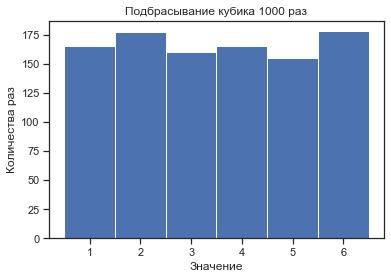

In [118]:
# Количество испытаний
trials = 1000

# Массив значений
values = numpy.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')
pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()

На больших числах распределение стремится к **равномерному**?.